In [1]:
import numpy as np
import GPy

X = np.array([[2,0,2,0],[2,0,4,2]])
Y = np.array([[8,24]]).T
kernel = GPy.kern.Integral_Output_Observed(input_dim=X.shape[1], variances=1, ARD=True, lengthscale=np.ones(X.shape[1]/2))
m = GPy.models.GPRegression(X,Y,kernel)
m.optimize(messages=True)
m.predict_noiseless(np.array([[2,1,3,1]]))

AttributeError: module 'GPy.kern' has no attribute 'Integral_Output_Observed'

In [ ]:
import numpy as np
import GPy

X = np.array([[1,0,3,2],[3,2,1,0]])
Y = np.array([[1,2]]).T
kernelA = GPy.kern.Integral_Output_Observed(input_dim=2, active_dims=[0,1], variances=1, ARD=True, lengthscale=[1])
kernelB = GPy.kern.Integral_Output_Observed(input_dim=2, active_dims=[2,3], variances=1, ARD=True, lengthscale=[1])
kernel = kernelA + kernelB
m = GPy.models.GPRegression(X,Y,kernel)
m.kern.integral.lengthscale = 1000
m.kern.integral_1.lengthscale = 1000

#m.optimize(messages=True)
m.predict_noiseless(np.array([[3,2,3,2]]))

(array([[ 1.54354249]]), array([[ 1.81760948]]))


 /home/mike/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


 /home/mike/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


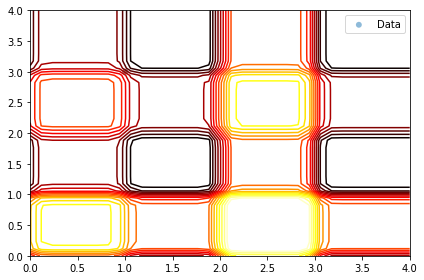

In [3]:
import numpy as np
import GPy
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([[1,0,3,2],[3,2,1,0]])
Y = np.array([[1,2]]).T
kernelA = GPy.kern.Multidimensional_Integral_Limits(input_dim=2, active_dims=[0,1], variances=1, ARD=True, lengthscale=[0.1])
kernelB = GPy.kern.Multidimensional_Integral_Limits(input_dim=2, active_dims=[2,3], variances=1, ARD=True, lengthscale=[0.1])
kernel = kernelA + kernelB
m = GPy.models.GPRegression(X,Y,kernel)
m.Gaussian_noise = 0.01

#m.optimize(messages=True)
print(m.predict_noiseless(np.array([[2.5,0,2.5,0]])))
m.plot(fixed_inputs=[(1,0),(3,0)],plot_limits=[[0,0],[4,4]])

(array([[ 0.]]), array([[ 1.]]))


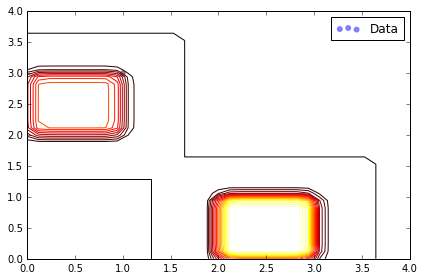

In [45]:
import numpy as np
import GPy
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([[1,0,3,2],[3,2,1,0]])
Y = np.array([[1,2]]).T
kernel = GPy.kern.Multidimensional_Integral_Limits(input_dim=4, variances=1, ARD=True, lengthscale=[0.1,0.1])
m = GPy.models.GPRegression(X,Y,kernel)
m.Gaussian_noise = 0.01

#m.optimize(messages=True)
print m.predict_noiseless(np.array([[2.5,0,2.5,0]]))
m.plot(fixed_inputs=[(1,0),(3,0)],plot_limits=[[0,0],[4,4]])